## ASSIGNMENT 2: INTRO TO ML

taking in the csv file

In [1]:
import pandas as pd

#reads csv file 
phrases = pd.read_csv("train.csv")
print(phrases.head())

   Index  Sentiment                                               Text
0      0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1      1          0  is upset that he can't update his Facebook by ...
2      2          0  @Kenichan I dived many times for the ball. Man...
3      3          0    my whole body feels itchy and like its on fire 
4      4          0  @nationwideclass no, it's not behaving at all....


# Step 1: Exploratory Data Analysis

Length of Dataframe

In [2]:
print("Length of the dataframe is ", len(phrases))


Length of the dataframe is  1048575


Check Sentiment Plot

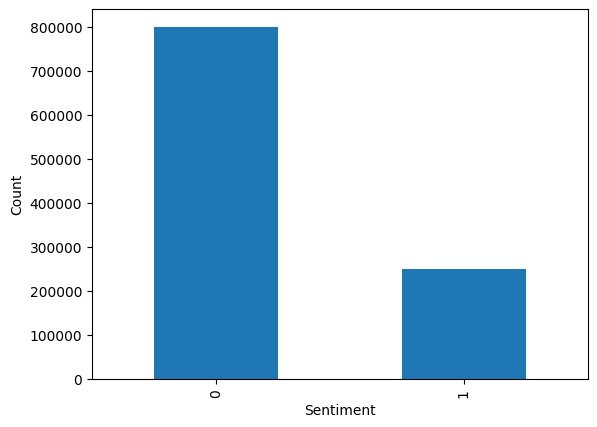

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#checks the counts of Sentiment values
sentiment_counts = phrases["Sentiment"].value_counts()
sentiment_counts.plot(kind="bar")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

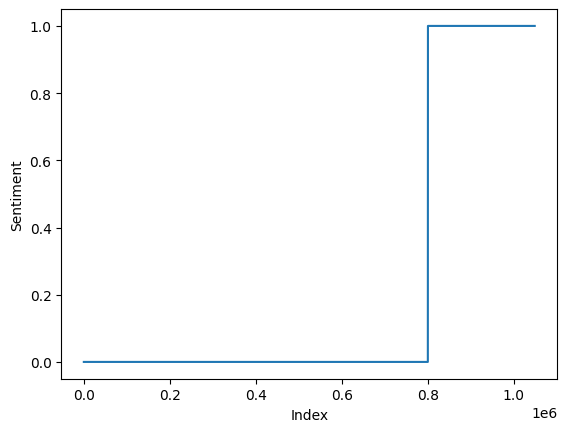

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#checks the distribution of Sentiment points
phrases["Sentiment"].plot()
plt.ylabel('Sentiment')
plt.xlabel('Index')
plt.show()

Check for missing values

In [5]:
missing_values = phrases.isnull().sum()

# print missing values
print(missing_values)

Index        0
Sentiment    0
Text         0
dtype: int64


# Step 2: Text Preprocessing

In [6]:
#initial file look and imports
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
stopwords = stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
print(phrases.head())

   Index  Sentiment                                               Text
0      0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1      1          0  is upset that he can't update his Facebook by ...
2      2          0  @Kenichan I dived many times for the ball. Man...
3      3          0    my whole body feels itchy and like its on fire 
4      4          0  @nationwideclass no, it's not behaving at all....


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alanw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
#makes the phrases lowercase
phrases["Text"] = phrases["Text"].str.lower()
phrases.head()

,Index,Sentiment,Text
0,0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,1,0,is upset that he can't update his facebook by ...
2,2,0,@kenichan i dived many times for the ball. man...
3,3,0,my whole body feels itchy and like its on fire
4,4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
#remove special characters 
symbols = {'`','~','!','@','#','$','%','^','&','*','(',')','_','-','+','=','{','[','}','}','|',':',';','"',"\'",'<',',','>','.','?','/'}
phrases["Text"] = phrases["Text"].apply(lambda x: re.sub('[%s]' % re.escape(''.join(symbols)), '', x))
print(phrases.head())

   Index  Sentiment                                               Text
0      0          0  switchfoot httptwitpiccom2y1zl  awww thats a b...
1      1          0  is upset that he cant update his facebook by t...
2      2          0  kenichan i dived many times for the ball manag...
3      3          0    my whole body feels itchy and like its on fire 
4      4          0  nationwideclass no its not behaving at all im ...


In [9]:
#removes punctuation
phrases["Text"] = phrases["Text"].str.replace('[^A-Za-z0-9]+',' ', regex = True)
print(phrases.head())

   Index  Sentiment                                               Text
0      0          0  switchfoot httptwitpiccom2y1zl awww thats a bu...
1      1          0  is upset that he cant update his facebook by t...
2      2          0  kenichan i dived many times for the ball manag...
3      3          0    my whole body feels itchy and like its on fire 
4      4          0  nationwideclass no its not behaving at all im ...


In [10]:
#remove links
phrases["Text"] = phrases["Text"].str.replace("http\S+", "", regex = True)
print(phrases.head())

   Index  Sentiment                                               Text
0      0          0  switchfoot  awww thats a bummer you shoulda go...
1      1          0  is upset that he cant update his facebook by t...
2      2          0  kenichan i dived many times for the ball manag...
3      3          0    my whole body feels itchy and like its on fire 
4      4          0  nationwideclass no its not behaving at all im ...


In [11]:
#removes numbers
phrases["Text"] = phrases["Text"].apply(lambda x: re.sub(r"[0-9]", "" , x))
print(phrases.head())

   Index  Sentiment                                               Text
0      0          0  switchfoot  awww thats a bummer you shoulda go...
1      1          0  is upset that he cant update his facebook by t...
2      2          0  kenichan i dived many times for the ball manag...
3      3          0    my whole body feels itchy and like its on fire 
4      4          0  nationwideclass no its not behaving at all im ...


In [12]:
#remove stopwords
phrases["Text"] = phrases["Text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print(phrases.head())

   Index  Sentiment                                               Text
0      0          0  switchfoot awww thats bummer shoulda got david...
1      1          0  upset cant update facebook texting might cry r...
2      2          0  kenichan dived many times ball managed save re...
3      3          0                   whole body feels itchy like fire
4      4          0           nationwideclass behaving im mad cant see


In [13]:
#Stemmers each word in the phrase
phrases['Text'] = phrases['Text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
print(phrases.head())

   Index  Sentiment                                               Text
0      0          0  switchfoot awww that bummer shoulda got david ...
1      1          0  upset cant updat facebook text might cri resul...
2      2          0  kenichan dive mani time ball manag save rest g...
3      3          0                    whole bodi feel itchi like fire
4      4          0              nationwideclass behav im mad cant see


In [14]:
#Lemmatize each word in the phrase
phrases['Text'] = phrases['Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
print(phrases.head())

   Index  Sentiment                                               Text
0      0          0  switchfoot awww that bummer shoulda got david ...
1      1          0  upset cant updat facebook text might cri resul...
2      2          0  kenichan dive mani time ball manag save rest g...
3      3          0                    whole bodi feel itchi like fire
4      4          0              nationwideclass behav im mad cant see


In [15]:
# Tokenize each phrase
phrases["Text"] = phrases["Text"].apply(nltk.word_tokenize)
print(phrases.head())

   Index  Sentiment                                               Text
0      0          0  [switchfoot, awww, that, bummer, shoulda, got,...
1      1          0  [upset, cant, updat, facebook, text, might, cr...
2      2          0  [kenichan, dive, mani, time, ball, manag, save...
3      3          0             [whole, bodi, feel, itchi, like, fire]
4      4          0       [nationwideclass, behav, im, mad, cant, see]


In [16]:
#source: https://medium.com/swlh/text-classification-using-the-bag-of-words-approach-with-nltk-and-scikit-learn-9a731e5c4e2f
#building the test
test = pd.read_csv("test.csv")
test["Text"] = test["Text"].str.lower()
symbols = {'`','~','!','@','#','$','%','^','&','*','(',')','_','-','+','=','{','[','}','}','|',':',';','"',"\'",'<',',','>','.','?','/'}
test["Text"] = test["Text"].apply(lambda x: re.sub('[%s]' % re.escape(''.join(symbols)), '', x))
test["Text"] = test["Text"].str.replace('[^A-Za-z0-9]+',' ', regex = True)
test["Text"] = test["Text"].str.replace("http\S+", "", regex = True)
test["Text"] = test["Text"].apply(lambda x: re.sub(r"[0-9]", "" , x))
test["Text"] = test["Text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
test['Text'] = test['Text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
test['Text'] = test['Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
test["Text"] = test["Text"].apply(nltk.word_tokenize)
print(test.head())

   Index  Sentiment                                               Text
0      0          1  [stellargirl, loooooooovvvvvvee, kindl, dx, co...
1      1          1        [read, kindl, love, lee, child, good, read]
2      2          1                [ok, first, ass, kindl, fuck, rock]
3      3          1  [kenburbari, youll, love, kindl, ive, mine, mo...
4      4          1    [mikefish, fair, enough, kindl, think, perfect]


# Step 3: Linguistic Feature Extraction.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
phrases = phrases.sample(frac=0.01)

Bag of Words

In [18]:
#source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(phrases["Text"].apply(lambda x: ' '.join(x)))
bag_of_words_test = vectorizer.transform(test["Text"].apply(lambda x: ' '.join(x)))
print(bag_of_words)
#print(bag_of_words.toarray())

  (0, 6519)	1
  (0, 4742)	1
  (0, 12954)	1
  (0, 9315)	1
  (0, 1381)	1
  (0, 15743)	1
  (0, 234)	1
  (0, 1692)	1
  (0, 14010)	1
  (0, 15077)	1
  (0, 1648)	1
  (0, 13814)	1
  (1, 6056)	1
  (1, 4503)	1
  (1, 11576)	1
  (1, 9609)	1
  (1, 13824)	2
  (1, 14570)	1
  (1, 4652)	1
  (1, 14533)	1
  (1, 6125)	1
  (1, 4282)	1
  (1, 15427)	1
  (1, 4948)	1
  (2, 6519)	1
  :	:
  (10482, 7914)	1
  (10482, 10905)	1
  (10482, 613)	1
  (10483, 8407)	1
  (10483, 14553)	1
  (10483, 1429)	1
  (10483, 12673)	1
  (10483, 10302)	1
  (10483, 1527)	1
  (10483, 8080)	1
  (10483, 3874)	1
  (10483, 14051)	1
  (10483, 6387)	1
  (10484, 6519)	1
  (10484, 14175)	1
  (10484, 10063)	1
  (10484, 5488)	1
  (10484, 3379)	2
  (10484, 3275)	1
  (10484, 10344)	1
  (10485, 14014)	1
  (10485, 15498)	1
  (10485, 8821)	1
  (10485, 14266)	1
  (10485, 10196)	1


tf*idf

In [19]:
#source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(phrases["Text"].apply(lambda x: ' '.join(x)))
tf_idf_test = vectorizer.transform(test["Text"].apply(lambda x: ' '.join(x)))
print(tf_idf)
#print(tf_idf.toarray())

  (0, 13814)	0.31867366165878647
  (0, 1648)	0.30619499528043076
  (0, 15077)	0.40588897243460736
  (0, 14010)	0.2447281510397694
  (0, 1692)	0.26389090304769824
  (0, 234)	0.37265764671654855
  (0, 15743)	0.27500409106137225
  (0, 1381)	0.2528633014931993
  (0, 9315)	0.23255645779681564
  (0, 12954)	0.33558885997339266
  (0, 4742)	0.20478421739514752
  (0, 6519)	0.1527606034593618
  (1, 4948)	0.20188051458573306
  (1, 15427)	0.2553177066553494
  (1, 4282)	0.27433894651281465
  (1, 6125)	0.24278873625843414
  (1, 14533)	0.1995883283809181
  (1, 4652)	0.23860047591693026
  (1, 14570)	0.18198308681916286
  (1, 13824)	0.6190143443002781
  (1, 9609)	0.180790060854722
  (1, 11576)	0.35615538985821676
  (1, 4503)	0.20762051062110973
  (1, 6056)	0.2101157393919656
  (2, 2791)	0.3861127980166142
  :	:
  (10482, 11713)	0.24963586450883407
  (10482, 9104)	0.29938146298733226
  (10482, 5765)	0.25977893857204887
  (10483, 6387)	0.37182358722817344
  (10483, 14051)	0.37182358722817344
  (10483, 387

# Step 4: Build your sentiment classification model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

Bag of words Sentiment Classification Model

In [21]:
# split data into training and testing sets
X_train = bag_of_words
Y_train = phrases["Sentiment"]
X_test = bag_of_words_test
Y_test = test["Sentiment"]

In [22]:
#source: Yingbo Ma: Coding Material: "Classification"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Train models
lr = LogisticRegression()     
lr.fit(X_train, Y_train)

svc = SVC(probability=True)
svc.fit(X_train, Y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

# Evaluate models on testing set
accuracy = lr.score(X_test, Y_test)
print("Accuracy using Bag of Words, Logistic Regression Model: {:.2f}%".format(accuracy * 100))

accuracy = svc.score(X_test, Y_test)
print("Accuracy using Bag of Words, SVC Model: {:.2f}%".format(accuracy * 100))

accuracy = rfc.score(X_test, Y_test)
print("Accuracy using Bag of Words, RFC Model: {:.2f}%".format(accuracy * 100))


Accuracy using Bag of Words, Logistic Regression Model: 69.08%
Accuracy using Bag of Words, SVC Model: 65.46%
Accuracy using Bag of Words, RFC Model: 67.41%


Tf*Idf SEntiment Classification Model

In [23]:
# Split data into training and testing sets
X_train = tf_idf
Y_train = phrases["Sentiment"]
X_test = tf_idf_test
Y_test = test["Sentiment"]

In [24]:
#source: Yingbo Ma: Coding Material: "Classification"
# train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, Y_train)
svc = SVC(probability=True)
svc.fit(X_train, Y_train)
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

# evaluate model on testing set
accuracy = lr.score(X_test, Y_test)
print("Accuracy using Tf*Idf, Logistic Regression Model: {:.2f}%".format(accuracy * 100))
accuracy = svc.score(X_test, Y_test)
print("Accuracy using Tf*Idf, SVC Model: {:.2f}%".format(accuracy * 100))
accuracy = rfc.score(X_test, Y_test)
print("Accuracy using Tf*Idf, RFC Model: {:.2f}%".format(accuracy * 100))

Accuracy using Tf*Idf, Logistic Regression Model: 64.35%
Accuracy using Tf*Idf, SVC Model: 62.12%
Accuracy using Tf*Idf, RFC Model: 65.46%


# Step 5: Model evaluation

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

Model Evalution for Bag of Words

              precision    recall  f1-score   support

           0       0.62      0.93      0.75       177
           1       0.87      0.46      0.60       182

    accuracy                           0.69       359
   macro avg       0.75      0.69      0.67       359
weighted avg       0.75      0.69      0.67       359

              precision    recall  f1-score   support

           0       0.59      0.98      0.74       177
           1       0.94      0.34      0.50       182

    accuracy                           0.65       359
   macro avg       0.76      0.66      0.62       359
weighted avg       0.77      0.65      0.62       359

              precision    recall  f1-score   support

           0       0.62      0.87      0.72       177
           1       0.79      0.47      0.59       182

    accuracy                           0.67       359
   macro avg       0.70      0.67      0.66       359
weighted avg       0.70      0.67      0.66       359



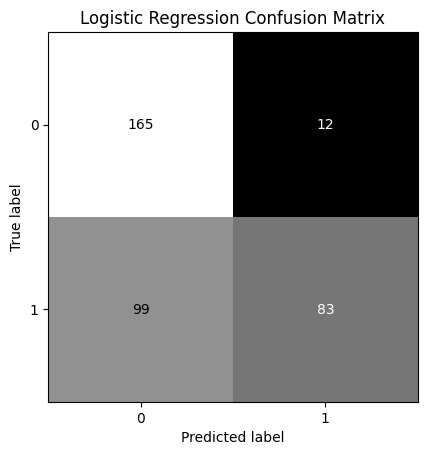

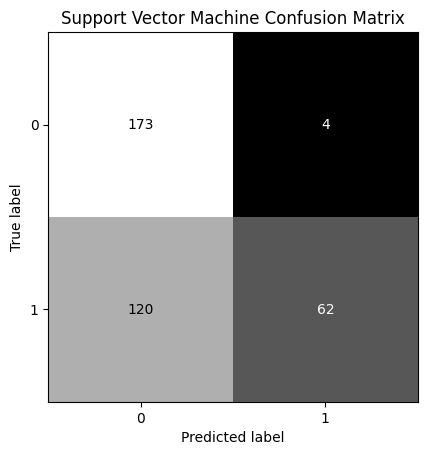

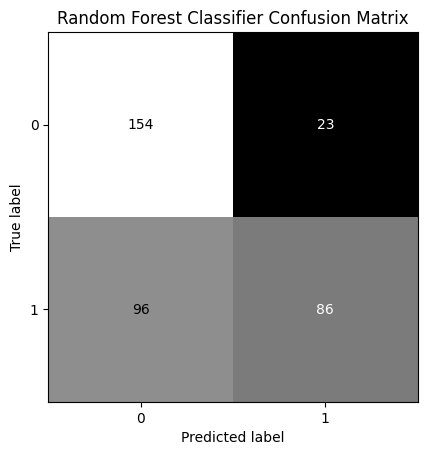

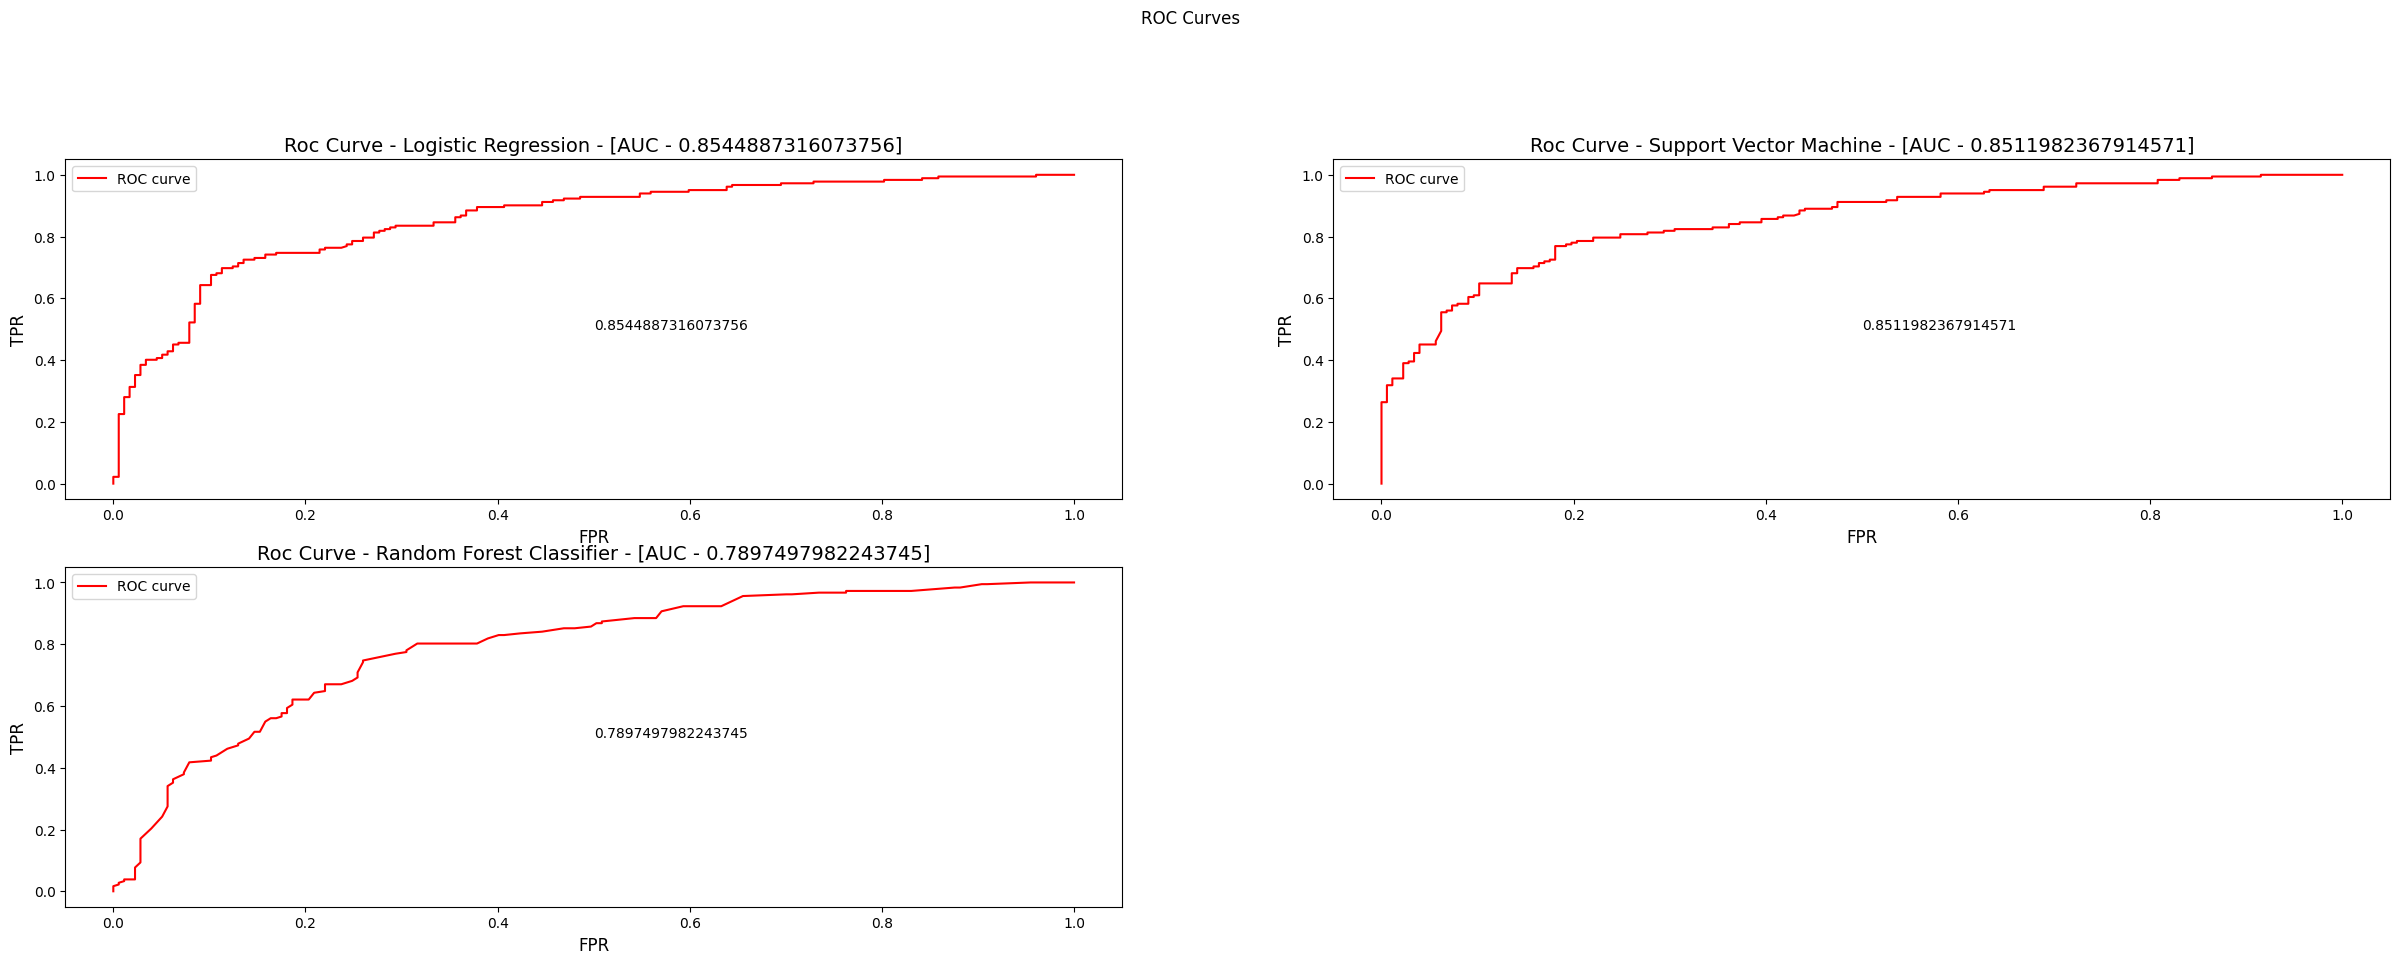

In [26]:
#source: Yingbo Ma: Coding Material: "Classification"
#scale factors
X_train = bag_of_words
Y_train = phrases["Sentiment"]
X_test = bag_of_words_test
Y_test = test["Sentiment"]

#set values functions
lc = LogisticRegression()
svc = SVC(probability=True)
rfc = RandomForestClassifier()

#using data to fit the models
lc.fit(X_train, Y_train)
svc.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)

#form categorization of each dataset 
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

#print the model evalution report
print(classification_report(Y_test, y_lc_predicted))
print(classification_report(Y_test, y_svc_predicted))
print(classification_report(Y_test, y_rfc_predicted))

#model, predication, pred_probabilities array functions
models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_rfc_pred_proba]


plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(Y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(Y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plt.text(.5,.5,auc(fpr, tpr))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

Model Evalution for tf_idf

              precision    recall  f1-score   support

           0       0.58      0.98      0.73       177
           1       0.94      0.32      0.48       182

    accuracy                           0.64       359
   macro avg       0.76      0.65      0.60       359
weighted avg       0.76      0.64      0.60       359

              precision    recall  f1-score   support

           0       0.57      0.99      0.72       177
           1       0.98      0.26      0.41       182

    accuracy                           0.62       359
   macro avg       0.77      0.63      0.57       359
weighted avg       0.78      0.62      0.56       359

              precision    recall  f1-score   support

           0       0.60      0.92      0.73       177
           1       0.84      0.42      0.56       182

    accuracy                           0.66       359
   macro avg       0.72      0.67      0.64       359
weighted avg       0.72      0.66      0.64       359



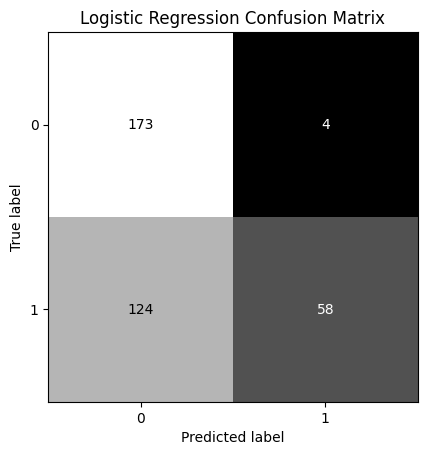

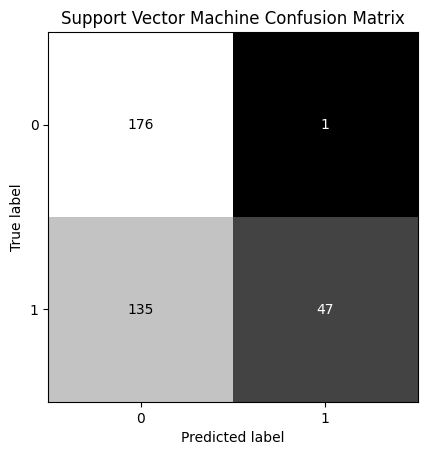

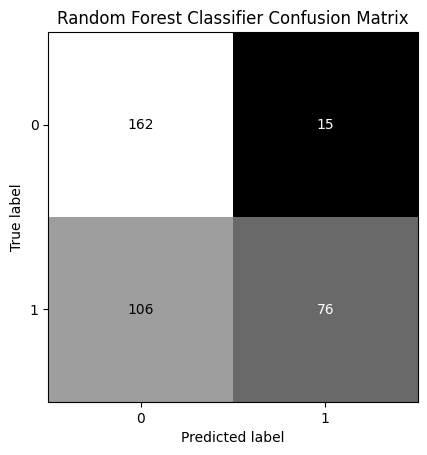

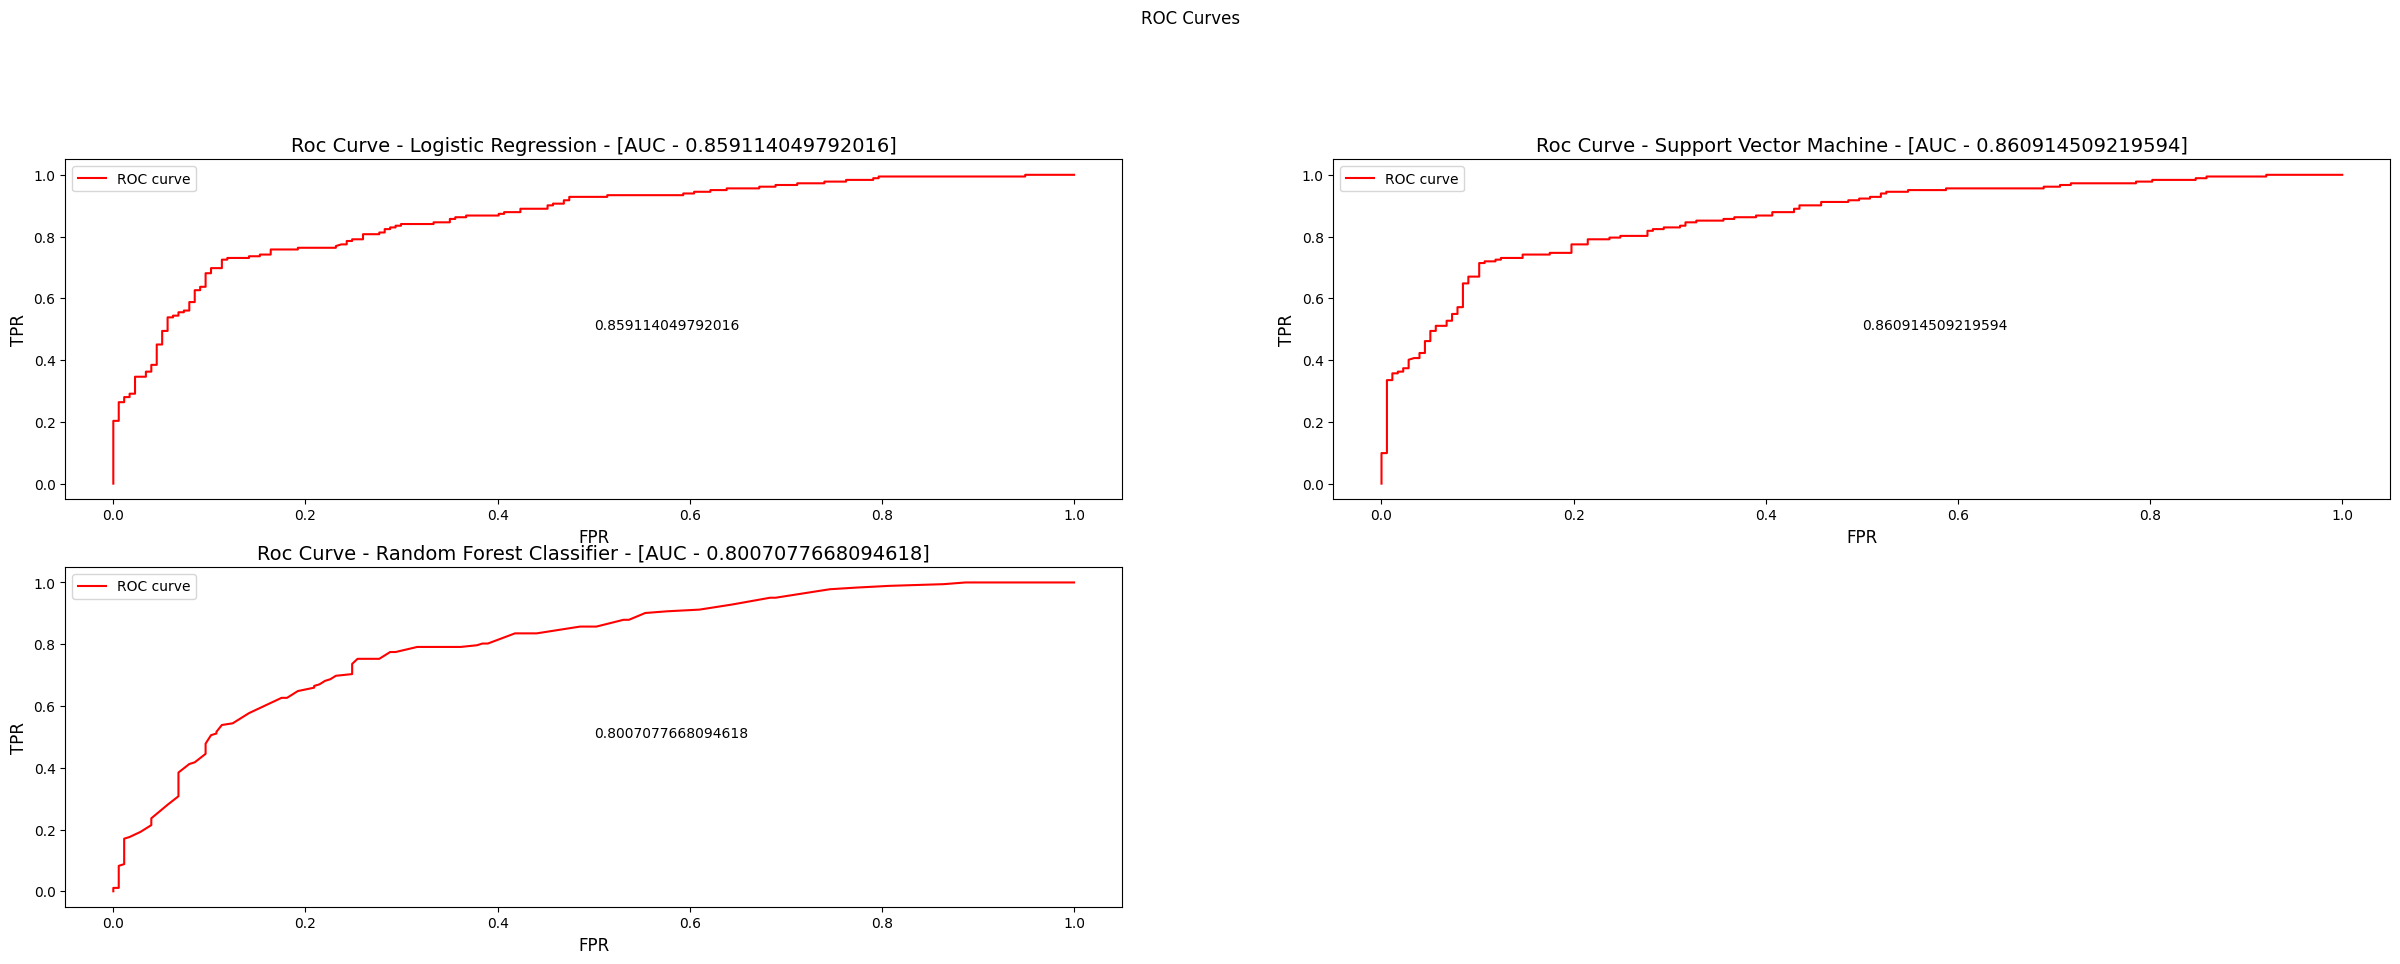

In [27]:
#source: Yingbo Ma: Coding Material: "Classification"
#scale factors
X_train = tf_idf
Y_train = phrases["Sentiment"]
X_test = tf_idf_test
Y_test = test["Sentiment"]

#set values functions
lc = LogisticRegression()
svc = SVC(probability=True)
rfc = RandomForestClassifier()

#using data to fit the models
lc.fit(X_train, Y_train)
svc.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)

#form categorization of each dataset 
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

#print the model evalution report
print(classification_report(Y_test, y_lc_predicted))
print(classification_report(Y_test, y_svc_predicted))
print(classification_report(Y_test, y_rfc_predicted))

#model, predication, pred_probabilities array functions
models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_rfc_pred_proba]


plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(Y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(Y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plt.text(.5,.5,auc(fpr, tpr))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()